In [2]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Homework 0:  Introduction

## Question 1

Compute the solution to the following sets of equations.  **FULLY** justify your solution (do not just write the answer).

If you want to review some of these concepts check out Strang's [Linear Algebra](https://clio.columbia.edu/catalog/10612929) text or for only the fundamentals check out Strang's [The Fundamental Theorem of Linear Algebra](http://www.jstor.org/stable/2324660?seq=1#page_scan_tab_contents)

**(a)** (5) Solve $A x = b$ where
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3
    \end{bmatrix} ~~~~ 
    b = \begin{bmatrix}
        1 \\
        -2
    \end{bmatrix}
$$

## Solution
To find our solution we augment the matrix and then push it into reduced row echelon form

1. Create the augmented matrix
$
    \begin{bmatrix}
        2 & 1 & 1 \\
        1 & 3 & -2
    \end{bmatrix}
$

2. Swap the two rows
$
    \begin{bmatrix}
        1 & 3 & -2 \\
        2 & 1 & 1
    \end{bmatrix}
$
3. Multiply the first row by -2 and add it to the second
$
    \begin{bmatrix}
        1 & 3 & -2 \\
        0 & -5 & 5
    \end{bmatrix} 
$
4. Multiply the second row by $\frac{3}{5}$ and add it to the first
$
    \begin{bmatrix}
        1 & 0 & 1 \\
        0 & -5 & 5
    \end{bmatrix} 
$
5. Multiply the second row by $-\frac{1}{5}$
$
    \begin{bmatrix}
        1 & 0 & 1 \\
        0 & 1 & -1
    \end{bmatrix}
$

From this form we can read off the solution as $x=\begin{bmatrix}1\\-1\end{bmatrix}$ 




**(b)** (5) Solve the system of equations:
\begin{align}
    2x + 3y &= 1 \\
    6x + 9y &= 3
\end{align}

Here it is clear that the two equations are linearly dependant, which means we will have an infinite number of solutions.

**(c)** (5) Why will I not be able to solve $Ax=b$ for
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3 \\
        0 & 4
    \end{bmatrix} ~~~~ 
    b = \begin{bmatrix}
        2 \\
        0 \\
        1
    \end{bmatrix}?
$$
Describe why this is a problem in terms of the column, row, left-null, and null spaces of $A$ and how that relates to the vector $b$.

#
# YOUR CODE HERE



## Question 2

**(a)** (10) Write a function that computes
$$
    \sum^\infty_{n=1} \frac{a^n}{b^{n-1}}
$$
until the difference between subsequent partial sums is less than the given tolerance $T$.  Return the computed sum.  Make sure to include a way for the function to exit if the partial sums do not satisfy the above criteria (the sum may not be convergent for instance).

In [3]:
def compute_sum(a, b, t):
    # Check if the input is valid (need to do a better closed form check here)
    if a >= b:
        raise ValueError
    tot = 0.0
    n = 1
    while True:
        next_term = (a ** n) / (b ** (n - 1))
        if abs(next_term) < t:
            break
        tot += next_term
        n += 1
    return tot

In [4]:
numpy.testing.assert_allclose(compute_sum(-2.0, 3.0, 1e-16), -1.2)
numpy.testing.assert_allclose(compute_sum(1.0, 2.0, 1e-16), 2.0)
try:
    compute_sum(2.0, 1.0, 1e-16)
except ValueError:
    pass
else:
    assert False

**(b)** (5) Explore different tolerances for your function above for $a=-2$ and $b=3$.  Plot the difference
$$
    \left| ~ \sum^\infty_{n=1} \frac{a^n}{b^{n-1}} - (-1.2) ~\right |
$$
versus the value of the tolerance.  The plotting command `loglog` may be useful to effectively visualize the problem.  What do you observe?

Hint:  Try using tolerances in the range $T \in [10^{-30}, 10^{-2}]$.

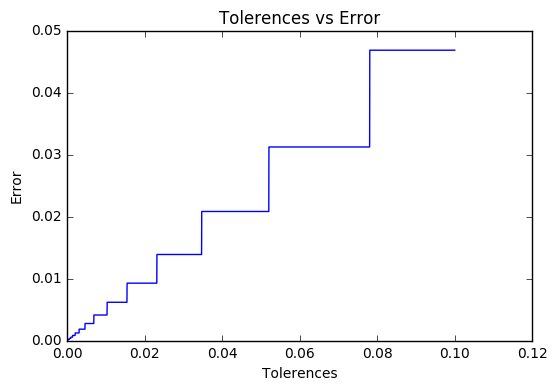

In [10]:
tols = numpy.linspace(10e-30, 10e-2, 5000)
vals = []
for tol in tols:
    vals.append(abs(compute_sum(-2, 3, tol) - (-1.2)))
plt.plot(tols, vals)
# plt.loglog(tols, vals)
plt.xlabel("Tolerences")
plt.ylabel("Error")
plt.title("Tolerences vs Error")

#
# YOUR CODE HERE



## Question 3

**(a)** (7) Compute the first 3 terms of the Taylor series of the function
$$
    f(x) = e^{-x^2} \sin( x - \pi)
$$
centered at $x_0 = \pi$.

## Solution
The formula for a taylor series for a function f(x) about $x=a$ is $f(x)=\sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!}(x-a)^n$

We start out by calculating the 1st and 2nd derivatives of our function

$$
\begin{align}
    f(x) &= e^{-x^2} \sin( x - \pi) \\
    f'(x) &= e^{-x^2}(2xsin(x) - cos(x)) \\
    f''(x) &= e^{-x^2}(3sin(x) + 2xcos(x)) - 2xe^{-x^2}(2xsin(x) - cos(x)))
\end{align}
$$

Now we plug these derivatives into the above form to obtain our 3 terms

$$
\begin{align}
t_0 &= e^{-\pi^2}\sin(\pi - \pi)(x - \pi)^0 = 0 \\
t_1 &= e^{-\pi^2}(2\pi sin(\pi) - cos(\pi))(x-\pi)^1 = e^{-\pi^2}(x-\pi) \\
t_2 &= \frac{e^{-\pi^2}(3sin(\pi) + 2\pi cos(\pi)) - 2\pi e^{-\pi^2}(2\pi sin(\pi) - cos(\pi)))}{2}(x-\pi)^2 = -2\pi e^{-\pi^2}(x-\pi)^2
\end{align}
$$

So our 2nd degree approximation of $f(x)$ about $x_0 = \pi$ would be 

$$
0+ e^{-\pi^2}(x-\pi) - 2\pi e^{-\pi^2}(x-\pi)^2
$$

**(b)** (8) Solve the ODE
$$
    u'' + u' + \frac{5}{4} u = 0
$$
with initial conditions $u(0) = 3$ and $u'(0) = 1$.  Plot the solution and comment on its behavior as $t \rightarrow \infty$.

## Solution
Begin by factoring the charactersitic polynomial

$$
\begin{align}
r^2 + r + \frac{5}{4} &= 0 \\
(r - (-\frac{1}{2} + i))(r - (-\frac{1}{2} - i)) &= 0
\end{align}
$$

Since we have two distinct imaginary roots we know our general solution must be

$$
\begin{align}
u(t) &= e^{-\frac{1}{2}t}(c_1cos(t) + c_2sin(t)) 
\end{align}
$$

Next we differentiate the general solution

$$
\begin{align}
u(t) &= e^{-\frac{1}{2}t}(c_1cos(t) + c_2sin(t)) \\
u'(t) &= e^{-\frac{1}{2}t}(c_2cos(t) - c_1sin(t)) - \frac{1}{2}e^{-\frac{1}{2}t}(c_1cos(t) + c_2sin(t)) 
\end{align}
$$

Then we plug in our initial conditions
$$
\begin{align}
3 &= c_1 \\
1 &= c_2 - \frac{1}{2}c_1 
\end{align}
$$

We which trivially gives $c_1 = 3$, $c_2 = \frac{5}{2}$

Finally we plug these constants back into the original equation to find our solution

$$
\begin{align}
u(t) &= e^{-\frac{1}{2}t}(3cos(t) + \frac{5}{2}sin(t)) = \frac{1}{2}e^{-\frac{1}{2}t}(6cos(x) + 5sin(x))
\end{align}
$$

From this equation it is clear to see that as $t \rightarrow \infty$, $u(t) \rightarrow 0$ because the term $e^{-\frac{1}{2}t}$ drives the function to 0. While it is being driven to 0, the function will oscillate due to the $6cos(x) + 5sin(x)$ term.

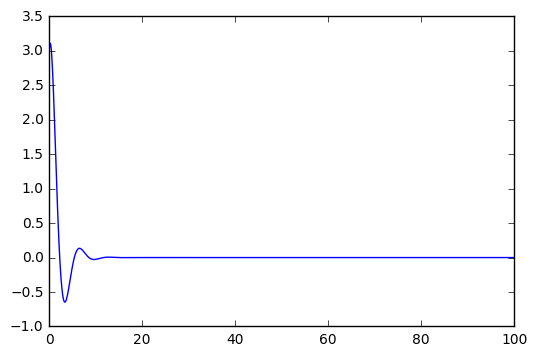

In [26]:
x = numpy.linspace(0, 100, 1000)
y = 0.5 * numpy.exp(-0.5* x) * (6 * numpy.cos(x) + 5 * numpy.sin(x))
plt.plot(x, y)

## Question 4

(5) Plot something fun making sure to label the axes and colorbar if appropriate.  Use the [matplotlib gallery](http://matplotlib.org/gallery.html) for inspiration.

In [28]:
plt.xkcd()
fig = plt.figure()
